3.1 Probabilistic Reasoning

3.2 Calibration of Credence Levels

4.2 Finding Patterns in Random Noise

8.1 Orders of Understanding

6.1 Correlation and Causation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from scipy.stats import logistic
from scipy.stats import norm
from scipy import stats
import seaborn as sns

# Investigating 2021 Housing Prices

## Introduction:

In this assignment, you will analyze a dataset to assess the potential impact of investments in various sectors on the economy of US cities, particularly focusing on whether specific investments could lead to increased housing prices. As a data scientist hired by a policymaker, your objective is to provide evidence either supporting or challenging the assertions regarding the economic benefits associated with these investments.

In [2]:
# Let's read in the data.
file_path = '/Users/mirandashen/Desktop/Villas-Boas_2023pset3.dta'
df = pd.read_stata(file_path)

              city state  pricesept2021  successteams  violentcrime2019  \
0         Chandler    AZ           1450             0             0.593   
1          Gilbert    AZ           1660             0             0.245   
2         Glendale    AZ           1130             0             0.863   
3             Mesa    AZ           1160             0             1.953   
4          Phoenix    AZ           1260             1            11.803   
..             ...   ...            ...           ...               ...   
93        Richmond    VA           1090             0             1.068   
94  Virginia Beach    VA           1290             0             0.581   
95         Seattle    WA           1690             1             4.471   
96         Spokane    WA           1000             0             1.520   
97         Madison    WI           1250             0             0.940   

    numberbars  aqi2020         gdp    popul2019  nteams  
0           79      119  237.470001   25

You will be using the dataset ‘df’ to analyze some of the variables you assessed above to determine where the policymaker should focus their proposals. The dataset contains characteristics for 98 US cities from 2019 to 2021. You will investigate the following variables:


| Variable      | Definition                                           | Source             |
|---------------|------------------------------------------------------|--------------------|
| city          | City name                                            |                    |
| state         | State name                                           |                    |
| pricesept2021 | One bedroom housing price, in USD                   | www.Zumper.com     |
| successteams  | Dummy variable =1 if at least one NBA, NFL, or MLB team in a city had a winning record last season (2020 season), =0 otherwise | Google search |
| violentcrime2019 | Violent crimes (in thousands)                      | FBI                |
| numberbars    | Number of bars, count                               | www.yellowpages.com|
| aqi2020       | Annual 2020 air quality index (AQI)                 | EPA                |
| gdp           | Gross domestic product (billion $)                  | BEA                |
| popuul2019    | 2019 population (in thousands of people)            | FBI                |
| nteams        | Number of major professional sports teams           | Google search      |


### Question 1

Based on the provided list of variables, which factors do you predict would have the largest impact on one-bedroom housing prices in September 2021, and which ones do you expect to have the smallest impact? Please list them in order of largest to smallest impact.

- The number of wins held by an NBA, NFL, or MLB team in the 2020 season
- The number of violent crimes in 2019
- The number of bars in 2021
- The air quality index (AQI) in 2020
- The gross domestic product (GDP) in 2021
- The population in 2019
- The number of major professional sports teams 
- The average household size in 2020
- The number of restaurants in 2021
- The average household salary in 2020
- The number of national parks in 2021

##### Type answer here.

## Sports Teams

The policymaker is a huge fan of sports, and they hypothesize that the cities with at least one sports team win in the 2020 season have higher housing prices than cities without a sports team win in the 2020 season.

Run the following cell to group the dataset by the success of sports teams in each city and plot histograms of one-bedroom housing prices for cities with successful and unsuccessful sports teams. The x-axis represents housing prices in USD, and the y-axis represents frequency.

In [3]:
# Group the dataset by 'successteams'
grouped_data = df.groupby('successteams')

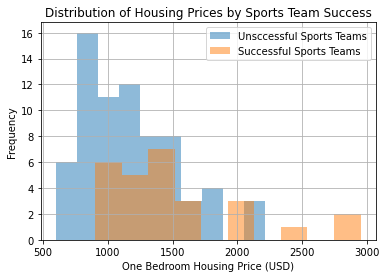

In [4]:
grouped_data['pricesept2021'].hist(alpha=0.5, bins=10)
plt.xlabel('One Bedroom Housing Price (USD)')
plt.ylabel('Frequency')
plt.legend(['Unsccessful Sports Teams', 'Successful Sports Teams'])
plt.title('Distribution of Housing Prices by Sports Team Success')
plt.show()

### Question 2:

What do you notice about the housing prices for cities with a successful sports team versus cities without a successful sports team?

##### Type answer here.

Interesting! Let's dig a bit deeper and see how much having a successful sports team in a given city actually impacts the city's housing prices.

Run the cell below. This cell splits the data up into two dataframes: one containing cities that have no winning sports teams and a second containing cities that have at least one winning sports team, and their respective 2021 housing prices. From there, the code determines the relative increase in housing prices across a random sample of 1,000 datapoints.

In [5]:
# Select data for successteams = 0 and successteams = 1
no_success = df[df['successteams'] == 0]['pricesept2021']
success = df[df['successteams'] == 1]['pricesept2021']

# Fit Gaussian to data
no_mu, no_std = norm.fit(no_success)
succ_mu, succ_std = norm.fit(success)
    
# Generate random samples from the Gaussian distributions
no_samples = np.random.normal(no_mu, no_std, 1000)
succ_samples = np.random.normal(succ_mu, succ_std, 1000)
    
# Subtract the two arrays to get deltas
deltas = succ_samples - no_samples
    
# Fit Gaussian to the delta
mu_delta, std_delta = norm.fit(deltas)
    
# Calculate probability that for any given house the price increases
probability = norm.cdf(0, mu_delta, std_delta)
    
# Print probabilities and means
print(f"Probability: {probability}, Mean: {mu_delta}")

Probability: 0.3099507986338179, Mean: 322.4846688871388


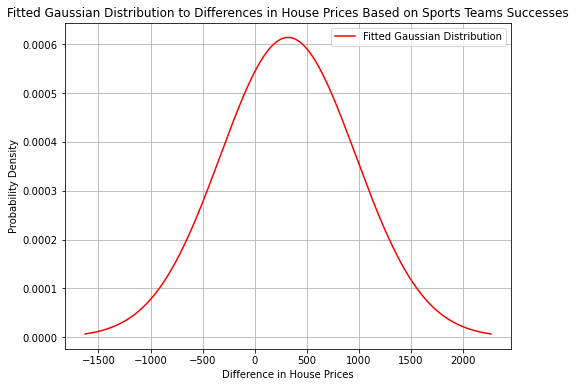

In [7]:
# Generate data points for plotting the fitted Gaussian distribution
x = np.linspace(mu_delta - 3*std_delta, mu_delta + 3*std_delta, 1000)
pdf = norm.pdf(x, mu_delta, std_delta)

# Plot the fitted Gaussian distribution
plt.figure(figsize=(8, 6))
plt.plot(x, pdf, 'r-', label='Fitted Gaussian Distribution')
plt.xlabel('Difference in House Prices')
plt.ylabel('Probability Density')
plt.title('Fitted Gaussian Distribution to Differences in House Prices Based on Sports Teams Successes')
plt.grid(True)
plt.legend()
plt.show()

### Question 3:

What do the variables **probability** and **mean** represent? How can the policymaker use them to gauge the importance of sports teams wins in change of housing prices?

##### Type answer here.

Excited by the these findings, the policymaker wastes no time in drafting key proposals aimed at leveraging the success of sports teams to drive economic growth:

#### Policy 1: Sports Infrastructure Investment
Invest in modern sports facilities to attract events and boost local businesses.

#### Policy 2: Sports Education and Training Programs
Expand sports programs in schools to develop talent and promote active lifestyles.

#### Policy 3: Sports Tourism Promotion
Market the city as a premier sports tourism destination to attract visitors.

#### Policy 4: Community Engagement and Outreach
Organize grassroots sports leagues and cultural events to build community spirit.

### Question 4:

Which of the four policies would you recommend the policymaker push forward? Feel free to run some exploratory data analyses on the dataset to support your answer.

##### Type answer here.

In [37]:
# OPTIONAL: Feel free to add code here.

The policymaker presents the proposed policy to the mayor, expecting approval, but the mayor is skeptical. "Is the most important thing we should be focusing on...sports?" the mayor questions.

As brainstormed in Question 1, there are a few other variables that we can consider in our proposals. Let's run some more analyses to see if we're missing something important.

## Air Quality Index (AQI)

Let's start of by assessing air quality index (AQI) of the 98 cities in 2020. Run the cells below to visualize the AQI and binarize the variable. Then, calculate the relative increase in housing prices again, this time for a random sample of 1,000 AQI datapoints.

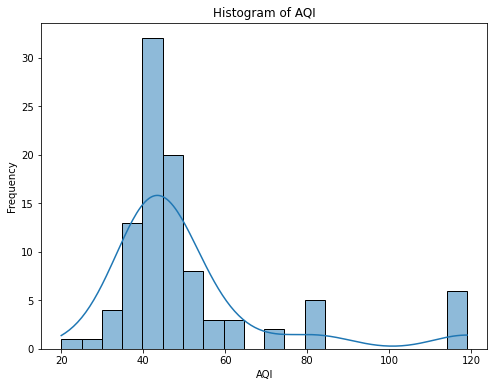

In [8]:
plt.figure(figsize=(8, 6))
sns.histplot(df['aqi2020'], bins=20, kde=True)
plt.title('Histogram of AQI')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()

The AQI is divided into six categories and ranges from 0 to 500. Each category corresponds to a different level of health concern. Moderate air quality ranges from 51 to 100. Based on this data, let's classify an AQI less than 75 to be "good air" and an AQI greater than or equal to 75 to be "bad air".

Run the cells before to binarize the AQI variable and re-calculate its probability of increasing housing prices and respective mean.

In [9]:
# Binarize AQI variable
df['aqi2020_binarized'] = (df['aqi2020'] >= 75).astype(int)

In [10]:
# Group the dataset by 'aqi2020_binarized'
aqi_grouped_data = df.groupby('aqi2020_binarized')

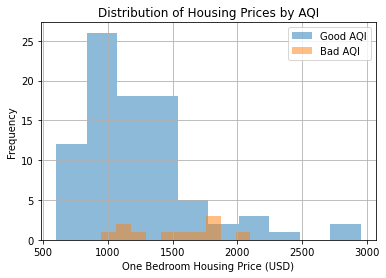

In [11]:
aqi_grouped_data['pricesept2021'].hist(alpha=0.5, bins=10)
plt.xlabel('One Bedroom Housing Price (USD)')
plt.ylabel('Frequency')
plt.legend(['Good AQI', 'Bad AQI'])
plt.title('Distribution of Housing Prices by AQI')
plt.show()

In [12]:
# Select data for aqi2020_binarized = 0 and aqi2020_binarized = 1
bad_aqi = df[df['aqi2020_binarized'] == 0]['pricesept2021']
good_aqi = df[df['aqi2020_binarized'] == 1]['pricesept2021']

# Fit Gaussian to data
bad_mu, bad_std = norm.fit(bad_aqi)
good_mu, good_std = norm.fit(good_aqi)
    
# Generate random samples from the Gaussian distributions
bad_samples = np.random.normal(bad_mu, bad_std, 1000)
good_samples = np.random.normal(good_mu, good_std, 1000)
    
# Subtract the two arrays to get deltas
aqi_deltas = good_samples - bad_samples
    
# Fit Gaussian to the delta
aqi_mu_delta, aqi_std_delta = norm.fit(aqi_deltas)
    
# Calculate probability that for any given house the price increases
aqi_probability = norm.cdf(0, aqi_mu_delta, aqi_std_delta)
    
# Print probabilities and means
print(f"Probability: {aqi_probability}, Mean: {aqi_mu_delta}")

Probability: 0.32757464381231416, Mean: 255.14200211392554


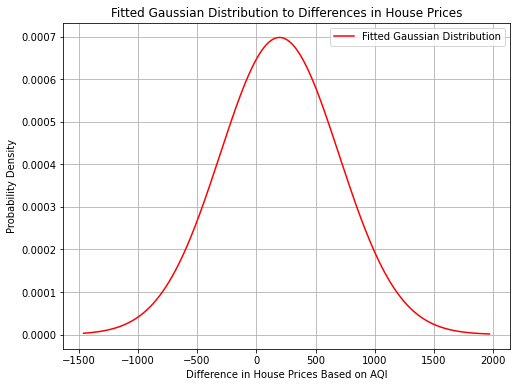

In [13]:
# Generate data points for plotting the fitted Gaussian distribution
aqi_x = np.linspace(aqi_mu_delta - 3*aqi_std_delta, aqi_mu_delta + 3*aqi_std_delta, 1000)
aqi_pdf = norm.pdf(x, aqi_mu_delta, aqi_std_delta)

# Plot the fitted Gaussian distribution
plt.figure(figsize=(8, 6))
plt.plot(aqi_x, aqi_pdf, 'r-', label='Fitted Gaussian Distribution')
plt.xlabel('Difference in House Prices Based on AQI')
plt.ylabel('Probability Density')
plt.title('Fitted Gaussian Distribution to Differences in House Prices')
plt.grid(True)
plt.legend()
plt.show()

Before choosing which sector to focus on, the policymaker wants to fully analyze the data we have. 

Let's run even more tests to investigate some additional variables.

## Gross Domestic Product (GDP)

Run the cells below to repeat the steps above, this time for GDP.

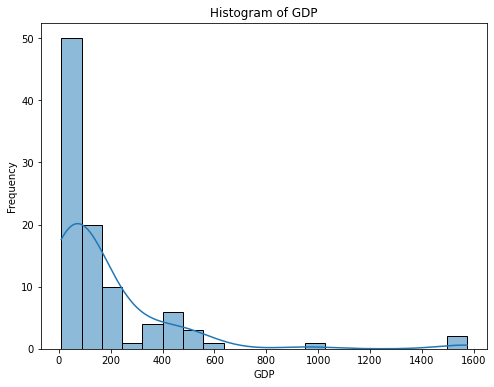

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(df['gdp'], bins=20, kde=True)
plt.title('Histogram of GDP')
plt.xlabel('GDP')
plt.ylabel('Frequency')
plt.show()

In [19]:
# Calculate mean and standard deviation of GDP
mean_gdp = df['gdp'].mean()
std_gdp = df['gdp'].std()

# Define threshold
threshold = mean_gdp + std_gdp

# Binarize GDP based on the threshold
df['gdp_binarized'] = df['gdp'].apply(lambda x: 1 if x > threshold else 0)

In [20]:
# Group the dataset by 'gdp_binarized'
gdp_grouped_data = df.groupby('gdp_binarized')

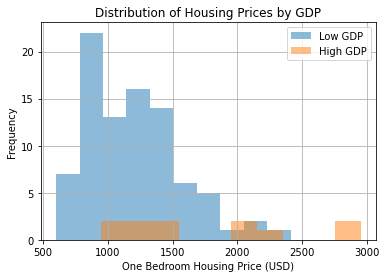

In [21]:
gdp_grouped_data['pricesept2021'].hist(alpha=0.5, bins=10)
plt.xlabel('One Bedroom Housing Price (USD)')
plt.ylabel('Frequency')
plt.legend(['Low GDP', 'High GDP'])
plt.title('Distribution of Housing Prices by GDP')
plt.show()

In [27]:
# Select data for gdp_binarized = 0 and gdp_binarized = 1
low_gdp = df[df['gdp_binarized'] == 0]['pricesept2021']
high_gdp = df[df['gdp_binarized'] == 1]['pricesept2021']

# Fit Gaussian to data
low_gdp_mu, low_gdp_std = norm.fit(low_gdp)
high_gdp_mu, high_gdp_std = norm.fit(high_gdp)

# Generate random samples from the Gaussian distributions
low_gdp_samples = np.random.normal(low_gdp_mu, low_gdp_std, 1000)
high_gdp_samples = np.random.normal(high_gdp_mu, high_gdp_std, 1000)

# Subtract the two arrays to get deltas
gdp_deltas = high_gdp_samples - low_gdp_samples

# Fit Gaussian to the delta
gdp_mu_delta, gdp_std_delta = norm.fit(gdp_deltas)

# Calculate probability that for any given house the price increases
gdp_probability = norm.cdf(0, gdp_mu_delta, gdp_std_delta)

# Print probabilities and means
print(f"Probability: {gdp_probability}, Mean: {gdp_mu_delta}")

Probability: 0.2309326364095502, Mean: 554.8731162383502


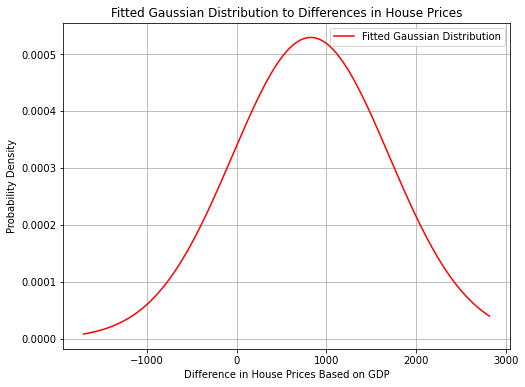

In [38]:
# Generate data points for plotting the fitted Gaussian distribution
gdp_x = np.linspace(gdp_mu_delta - 3*gdp_std_delta, gdp_mu_delta + 3*gdp_std_delta, 1000)
gdp_pdf = norm.pdf(x, gdp_mu_delta, gdp_std_delta)

# Plot the fitted Gaussian distribution
plt.figure(figsize=(8, 6))
plt.plot(gdp_x, gdp_pdf, 'r-', label='Fitted Gaussian Distribution')
plt.xlabel('Difference in House Prices Based on GDP')
plt.ylabel('Probability Density')
plt.title('Fitted Gaussian Distribution to Differences in House Prices')
plt.grid(True)
plt.legend()
plt.show()

## Violent Crimes

Run the cells below to repeat the steps above, this time for violent crimes.

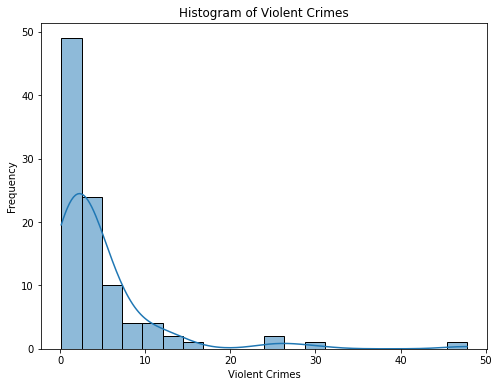

In [29]:
plt.figure(figsize=(8, 6))
sns.histplot(df['violentcrime2019'], bins=20, kde=True)
plt.title('Histogram of Violent Crimes')
plt.xlabel('Violent Crimes')
plt.ylabel('Frequency')
plt.show()

In [31]:
# Calculate mean and standard deviation of GDP
mean_crime = df['violentcrime2019'].mean()
std_crime = df['violentcrime2019'].std()

# Define threshold
threshold = mean_crime + std_crime

# Binarize GDP based on the threshold
df['crime_binarized'] = df['violentcrime2019'].apply(lambda x: 1 if x > threshold else 0)

In [32]:
# Group the dataset by 'crime_binarized'
crime_grouped_data = df.groupby('crime_binarized')

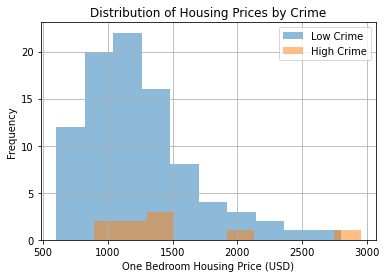

In [33]:
crime_grouped_data['pricesept2021'].hist(alpha=0.5, bins=10)
plt.xlabel('One Bedroom Housing Price (USD)')
plt.ylabel('Frequency')
plt.legend(['Low Crime', 'High Crime'])
plt.title('Distribution of Housing Prices by Crime')
plt.show()

In [34]:
# Select data for crime_binarized = 0 and crime_binarized = 1
low_crime = df[df['crime_binarized'] == 0]['pricesept2021']
high_crime = df[df['crime_binarized'] == 1]['pricesept2021']

# Fit Gaussian to data
low_crime_mu, low_crime_std = norm.fit(low_crime)
high_crime_mu, high_crime_std = norm.fit(high_crime)

# Generate random samples from the Gaussian distributions
low_crime_samples = np.random.normal(low_crime_mu, low_crime_std, 1000)
high_crime_samples = np.random.normal(high_crime_mu, high_crime_std, 1000)

# Subtract the two arrays to get deltas
crime_deltas = high_crime_samples - low_crime_samples

# Fit Gaussian to the delta
crime_mu_delta, crime_std_delta = norm.fit(crime_deltas)

# Calculate probability that for any given house the price increases
crime_probability = norm.cdf(0, crime_mu_delta, crime_std_delta)

# Print probabilities and means
print(f"Probability: {crime_probability}, Mean: {crime_mu_delta}")

Probability: 0.3589000922948294, Mean: 261.02428592015394


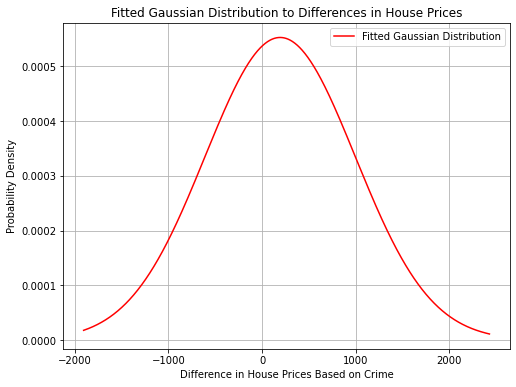

In [36]:
# Generate data points for plotting the fitted Gaussian distribution
crime_x = np.linspace(crime_mu_delta - 3*crime_std_delta, crime_mu_delta + 3*crime_std_delta, 1000)
crime_pdf = norm.pdf(x, crime_mu_delta, crime_std_delta)

# Plot the fitted Gaussian distribution
plt.figure(figsize=(8, 6))
plt.plot(crime_x, crime_pdf, 'r-', label='Fitted Gaussian Distribution')
plt.xlabel('Difference in House Prices Based on Crime')
plt.ylabel('Probability Density')
plt.title('Fitted Gaussian Distribution to Differences in House Prices')
plt.grid(True)
plt.legend()
plt.show()

### Question 5:

Compare and contrast the results of each variable's probability and mean values.

Reminder: the probability represents the increase is housing prices for 1) having at least one winning sports team, 2) having "good" AQI, 3) having "high" GDP, 4) having "high crime" in a given city.

##### Type answer here.

### Question 6:

Based on your answer to Question 5, the policymaker wants to draft a brief policy that should be proposed to the mayor. Choose the most important factor and draft a brief policy that should be proposed to the mayor.

##### Type answer here.

The policymaker takes your drafted policy to the mayor. While impressed by the analyses, the mayor sighs and expresses that he still can't make a decision based on the data. Why?

## Correlation versus Causation

The values we calculated in this module are measures of association, not causation. Making policy decisions based solely on correlation without considering potential confounding variables or underlying mechanisms can lead to ineffective or harmful interventions.

## Reflection

How orders of understanding in our analysis of housing prices and successful sports teams impact the decisions made by our policy makers?

Can you recall a situation where you or others narrowed our focus to the point of missing out on key data in an analysis? How did this affect our decision-making process?

Why is it important for our real estate company to be cautious of expressing high levels of confidence in our findings about the impact of sports team success on housing prices?

Explain how recognizing multiple causes of varying importance, such as housing prices, air quality, and crime rates, contributes to our understanding of the relationship between sports team success and housing prices.

Discuss the ethical considerations involved in deciding which factors to include or exclude when modeling the relationship between housing prices and sports team success. How can our values inform these decisions?
